Headline Length

In [2]:
import pandas as pd

news_df = pd.read_csv('../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')
news_df['headline_length'] = news_df['headline'].apply(len)
print(news_df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Articles per Publisher

In [7]:
publisher_counts = news_df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


 Publication Dates

In [10]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df['date_only'] = news_df['date'].dt.date
daily_counts = news_df.groupby('date_only').size()

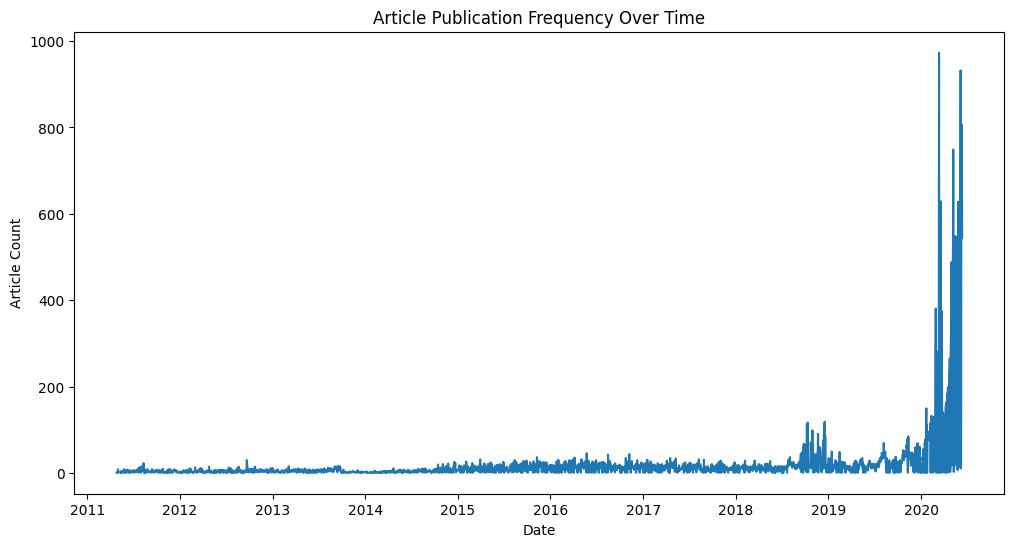

In [11]:
import matplotlib.pyplot as plt
daily_counts.plot(kind='line', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.title('Article Publication Frequency Over Time')
plt.show()

Text Analysis (Topic Modeling)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(news_df['headline'])
top_words = vectorizer.get_feature_names_out()
print(top_words)

['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


In [ ]:
print(news_df['date'].head())
print(news_df['date'].dtype)


0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
object


In [6]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

Publishing Times

NameError: name 'plt' is not defined

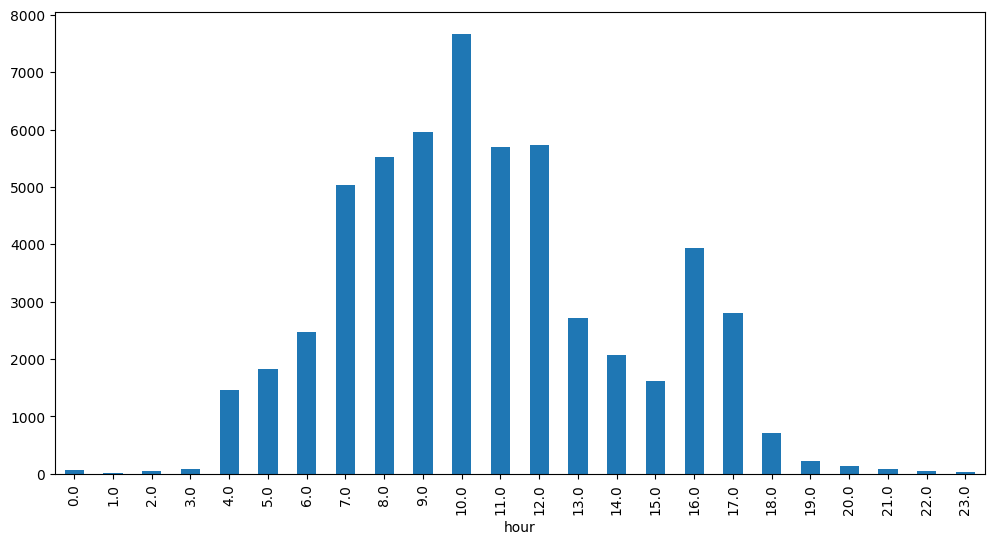

In [7]:
news_df['hour'] = news_df['date'].dt.hour
hourly_counts = news_df.groupby('hour').size()
hourly_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Hour of Day')
plt.ylabel('Article Count')
plt.title('Article Publication by Hour')
plt.show()

Publisher Count